HLT Assignment_Group D(ML_07 Assignment)
1. Michael NANA KAMENI
2. Rabiu BALA
3. Seun OLORUNTOBA 
4. Olisaeloka IGWEBIKE

##N.B : You have to run this program on several iterations required to be able to see the line graphs, mean and standard deviation of the outputs(y)which is calculated as additional exercise for this assignment. For instance you have to run it 18 times to see the 18 iterations conducted in completing this assignment.

In addition to practising the process of loading data, regularizing it and using it to train a model, the goal of this assignment is to investigat the effect of changing model parameters on the performance.

## Step 1: loading the data

We'll be going a bit further with the robot collision dataset. This time, instead of looking at just the first file, we'll look at all five different tasks combined (lp1.data to lp5.data). Prepare two different arrays, X1 and X2, as follows:
- Each element in X1 is the immediate reading of the force and torque values after an event, [f1, f2, f3, t1, t2, t3]. The first element should be [1, 1, 63, -3, -1, 0]
- Each element in X2 contains 18 values in total - the first, fifth and tenth sets of sensor readings after an event. The first element should be [-1, -1, 63, -3, -1, 0, -1, -1, 63, -3, -1, 0, -1, -1, 61, -3, 0, 0]

y should contain the corresponding classes, represented as integers according the the provided dictionary

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Combine all the 5 files in readiness to read the datafrom it
files = ['robot_execution_failure/lp1.data', 'robot_execution_failure/lp2.data',
'robot_execution_failure/lp3.data', 'robot_execution_failure/lp4.data', 'robot_execution_failure/lp5.data']
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} #Classes to be referenced 

In [3]:
filename = 'combine_files.csv'               # assign to filename a csv filename 
with open(filename, 'w') as combination:     # open the filename as combination 
    for file in files:                       # iterate on the different dataset files
        with open(file, 'r') as f:                # open each dataset file as f
            combination.write(f.read())      # write the content of each on combine_files

In [4]:
f1 = open('combine_files.csv', 'r')
lines = f1.readlines() 
lines[:5]                                    # Return the first five lines.

['normal\n',
 '\t-1\t-1\t63\t-3\t-1\t0\n',
 '\t0\t0\t62\t-3\t-1\t0\n',
 '\t-1\t-1\t61\t-3\t0\t0\n',
 '\t-1\t-1\t63\t-2\t-1\t0\n']

In [5]:
X1 = [] # inputs-declare a new list as X1
y = [] # true values-declare a new list as y
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use them as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        features = [int(x) for x in lines[i+1].strip().split('\t')] # Split the next line to get our features
        X1.append(features)
        y.append(classes[line]) # And record which class this set of features belongs to

In [6]:
X1 = np.array(X1) #Convert to numpy array as required
X1[0] #Confirm the first row of the array

array([-1, -1, 63, -3, -1,  0])

In [7]:
len(X1) #Confirm the lenght(rows)of the array

269

In [8]:
X2 = [] # input - declare a new list as X1
y = [] # true values - declare a new list as y
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        a = [int(x) for x in lines[i+1].strip().split('\t')] # Split the first next five lines 
        b = [int(x) for x in lines[i+5].strip().split('\t')] # Split the next five lines from the fifth
        c = [int(x) for x in lines[i+10].strip().split('\t')] # Split the next five lines from the tenth
        X2.append(a + b + c)
        y.append(classes[line]) # And record which class this set of features belongs to

In [9]:
X2 = np.array(X2) #Convert to numpy array as required
X2[0] #Confirm the first row of the array

array([-1, -1, 63, -3, -1,  0, -1, -1, 63, -3, -1,  0, -1, -1, 61, -3,  0,
        0])

In [10]:
len(X2) #Confirm the lenght(rows)of the array

269

## Step 2: establishing a baseline

Using techniques covered in this unit, split X1 and y into separate training and testing sets. Use the training set to train a neural network (MLPClassifier) using default parameters but with hidden_layer_sizes=(20, 20, 20). Use the test data you held back to score the model you have created. How well does it perform? Print out the score and confusion matrix. For more accuracy, run through these steps 10 times and find the average score - bonus points for running more times and getting a standard deviation!

#### Let us first split data into training and test set.

In [11]:
# Split data into train and test set
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [12]:
len(X1_train) #Confirm the lenght(rows)of the training array

215

In [13]:
len(X1_test) #Confirm the lenght(rows)of the training array

54

In [14]:
# Prepare and scale the inputs
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test  = scaler.transform(X1_test)

In [15]:
# Create the neural network
mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter =10000)

In [16]:
# Fit and train the model
mlp.fit(X1_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### How well does it perform? Print out the score and confusion matrix

In [17]:
# Predict the model 
prediction = mlp.predict(X1_test)

In [18]:
print(mlp.score(X1_test, y_test))
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,prediction))

0.7037037037037037
[[22  0  0  1]
 [ 0 12  3  3]
 [ 1  5  3  1]
 [ 1  1  0  1]]


In [19]:
scores = mlp.score(X1_test, y_test)
scores

0.7037037037037037

In [20]:
# Let us iterate and save the result in a file calls scoreResult.csv
filename = 'scoreResult.csv'
with open(filename, 'a') as file:                 # open the filename as file 
    file.write(str(scores) + '\n')                # write the content of each on scoreResult.csv

In [21]:
y_values = [line.rstrip('\n') for line in open('scoreResult.csv', 'r')]
y_values_new = []
for item in y_values:
    y_values_new.append(float(item)) 
y_values_new = np.array(y_values_new)
print(y_values_new)
X = np.array([int(i) for i in range(0,len(y_values_new))])   # Number of iterations
X 

[0.77777778 0.77777778 0.75925926 0.74074074 0.77777778 0.7962963
 0.77777778 0.77777778 0.75925926 0.75925926 0.72222222 0.72222222
 0.75925926 0.75925926 0.72222222 0.74074074 0.72222222 0.77777778
 0.7037037  0.75925926 0.75925926 0.74074074 0.74074074 0.72222222
 0.74074074 0.77777778 0.77777778 0.75925926 0.75925926 0.7037037
 0.74074074 0.72222222 0.7037037  0.75925926 0.74074074 0.77777778
 0.77777778 0.72222222 0.77777778 0.7037037  0.75925926 0.75925926
 0.75925926 0.7962963  0.72222222 0.7037037 ]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [22]:
#Calculate the average of the scores 
Mean_Score = y_values_new.mean()
Mean_Score
print('Mean Score of the Performace is',""+ str(Mean_Score))

Mean Score of the Performace is 0.75


In [23]:
#Calculate the Standard deviation of the scores
Std_deviation_Score = y_values_new.std()
Std_deviation_Score
print('Std_deviation of the Performace is',""+ str(Std_deviation_Score))

Std_deviation of the Performace is 0.026117876945746535


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

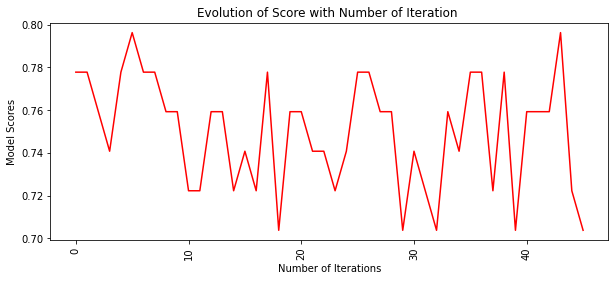

In [24]:
fig = plt.figure(figsize=(10,4))
plt.plot(X, y_values_new, color ='red')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.xticks(rotation=90)

Response to Questions(Performance of the model) : The mean score after 18 iterations is 0.76 which is not a bad performance result but can be improved upon based on variation of the input data. The standard deviation is 0.032 which shows the variaiton from mean was not much after 18 iterations. 

If you're getting a convergence warning, you could try having the model train over more iterations - change max_iter = 1000 or 10,000. Does this improve the average score?

In [25]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter =1000)

In [26]:
# let us fit or train data
mlp.fit(X1_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
# Use test set to set back the score
prediction = mlp.predict(X1_test)

In [28]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
scores = mlp.score(X1_test, y_test)
print(scores)
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,prediction))

0.6481481481481481
[[19  0  0  4]
 [ 1 11  3  3]
 [ 1  5  4  0]
 [ 1  1  0  1]]


In [29]:
# Let us run and save the result in a file calls scoreResult.csv
filename = 'scoreResult1.csv'
with open(filename, 'a') as file:                 # open the filename as file 
    file.write(str(scores) + '\n')                # write the content of each on scoreResult.csv

In [30]:
# Load the scoreResult in a list called y_values_new 
y_values1 = [line.rstrip('\n') for line in open('scoreResult1.csv', 'r')]
y_values_new1 = []
for item in y_values1:
    y_values_new1.append(float(item)) 
y_values_new1 = np.array(y_values_new1)
print(y_values_new1)
X = np.array([int(i) for i in range(0,len(y_values_new1))])   # Number of iterations
X 

[0.74074074 0.68518519 0.77777778 0.77777778 0.75925926 0.77777778
 0.7037037  0.75925926 0.74074074 0.72222222 0.74074074 0.72222222
 0.74074074 0.74074074 0.66666667 0.75925926 0.74074074 0.74074074
 0.74074074 0.75925926 0.77777778 0.7962963  0.77777778 0.72222222
 0.72222222 0.75925926 0.74074074 0.74074074 0.7962963  0.72222222
 0.75925926 0.72222222 0.7037037  0.74074074 0.75925926 0.74074074
 0.72222222 0.74074074 0.7962963  0.72222222 0.74074074 0.75925926
 0.74074074 0.75925926 0.77777778 0.64814815]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [31]:
#Calculate the average of the scores 
Mean_Score = y_values_new1.mean()
Mean_Score
print('Mean Score of the Performace is',""+ str(Mean_Score))

Mean Score of the Performace is 0.7431561996779388


In [32]:
#Calculate the Standard deviation of the scores
Std_deviation_Score = y_values_new1.std()
Std_deviation_Score
print('Std_deviation of the Performace is',""+ str(Std_deviation_Score))

Std_deviation of the Performace is 0.030553407344622027


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

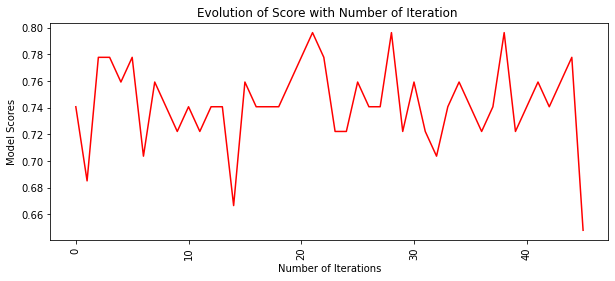

In [33]:
fig = plt.figure(figsize=(10,4))
plt.plot(X, y_values_new1, color ='r', label ='Model Scores')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.xticks(rotation=90)

Response to Questions(Performance of the model) : With Max_iter =1000, the mean score after 18 iterations is $0.75$ which is not a bad performance result but less than the score without iteration which was $0.74$. The standard deviation is also was higher than without iteration while the standard deviation was $0.026$ the previous one without max-iter was $0.030$ which shows the variaiton from mean was a bit much with max_iter compared to the model without it. 

## Step 3: adding more inputs

Use X2 in place of X1 - does the score increase or decrease? Was this what you expected? How many samples are there in our training set?

In [34]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [35]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test  = scaler.transform(X2_test)

In [36]:
len(X2_train) #The training set contain 215 training set(rows)

215

In [37]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter = 10000)

In [38]:
# Let us fit or tain data
mlp.fit(X2_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
# Use test set to predict the model
predictions = mlp.predict(X2_test)

In [40]:
scores2 = mlp.score(X2_test, y_test)
print(scores2)
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,predictions))

0.8333333333333334
[[23  0  0  0]
 [ 1 15  2  0]
 [ 1  3  6  0]
 [ 1  1  0  1]]


In [41]:
# Let us run and save the result in a file calls scoreResult.csv
filename = 'scoreResult2.csv'
with open(filename, 'a') as file:                 # open the filename as file 
    file.write(str(scores2) + '\n')               # write the content of each on scoreResult2.csv

In [42]:
# Load the scoreResult in a list called y_values_new 
y_values2 = [line.rstrip('\n') for line in open('scoreResult2.csv', 'r')]
y_values_new2 = []
for item in y_values2:
    y_values_new2.append(float(item)) 
y_values_new2 = np.array(y_values_new2)
print(y_values_new2)
X = np.array([int(i) for i in range(0,len(y_values_new2))])   # Number of iterations
X 

[0.7962963  0.74074074 0.81481481 0.75925926 0.83333333 0.85185185
 0.7962963  0.81481481 0.7962963  0.7962963  0.7962963  0.7962963
 0.83333333 0.81481481 0.83333333 0.81481481 0.83333333 0.81481481
 0.83333333 0.81481481 0.7962963  0.81481481 0.7962963  0.85185185
 0.7962963  0.83333333 0.83333333 0.7962963  0.85185185 0.7962963
 0.87037037 0.75925926 0.7962963  0.77777778 0.7962963  0.81481481
 0.83333333 0.77777778 0.83333333 0.83333333 0.85185185 0.83333333
 0.81481481 0.7962963  0.77777778 0.83333333]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [43]:
#Calculate the average of the scores 
Mean_Score = y_values_new2.mean()
Mean_Score
print('Mean Score of the Performace is',""+ str(Mean_Score))

Mean Score of the Performace is 0.8119967793880839


In [44]:
#Calculate the Standard deviation of the scores
Std_deviation_Score = y_values_new2.std()
Std_deviation_Score
print('Std_deviation of the Performace is',""+ str(Std_deviation_Score))

Std_deviation of the Performace is 0.02674332315658998


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

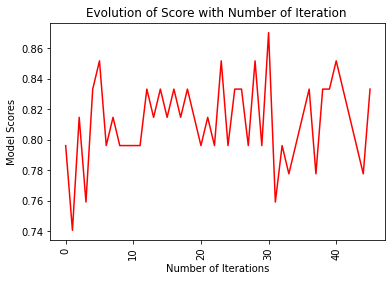

In [45]:
# plot the Evolution of Score with Number of Iteration
plt.plot(X, y_values_new2, color ='r', label ='Model Scores')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.xticks(rotation=90)

Response to Questions(Performance of the model)X2 : The mean score after 18 iterations is 0.82 which is a significant improvement over the previous X1 inputs and a better score with better acuracy(82%). It was expected because each line in X2 has more dataset with each row in the array having 18 dataset(18 dimentional). The standard deviation is 0.027 which shows the variaiton from mean was the lowest compared to the previous two models after 18 iterations. 

## Step 4: feature engineering

Back to X1 as our input. Add an extra feature to each item in the array to represent the total force $f_t$. Assume:

$f_t^2 = f_1^2 + f_2^2 + f_3^2$

Your first input should now look like this:
X1[0] = [-1, -1, 61, -3, 0, 0, 61.0163912403872]

In [46]:
import numpy as np
X3 = []
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        a = [int(x) for x in lines[i+10].strip().split('\t')] # Split the first next five lines 
        X3.append(a)
        y.append(classes[line]) # And record which class this set of features belongs to

In [47]:
X_new = []
for x in X3:
    force_squared = x[0]**2 + x[1]**2 + x[2]**2
    X_new.append(x + [np.sqrt(force_squared)])
print(X_new[0]) # Look at the first input

[-1, -1, 61, -3, 0, 0, 61.0163912403872]


In [48]:
# Convert list to numpy array
X3 = np.array(X_new)

In [49]:
# Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

In [50]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [51]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(30,30,30), max_iter = 10000)

In [52]:
# Fit and train the data
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [53]:
# Predict the model
predict = mlp.predict(X_test)

In [54]:
scores3 = mlp.score(X_test, y_test)
print(scores3)
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,predict))

0.7592592592592593
[[22  0  1  0]
 [ 4 12  2  0]
 [ 2  2  6  0]
 [ 1  1  0  1]]


In [55]:
# Let us run several iterations and save the result in a file calls scoreResult.csv
filename = 'scoreResult3.csv'
with open(filename, 'a') as file:                 # open the filename as file 
    file.write(str(scores3) + '\n')               # write the content of each on scoreResult3.csv

In [56]:
# Load the scoreResult in a list called y_values_new 
y_values3 = [line.rstrip('\n') for line in open('scoreResult3.csv', 'r')]
y_values_new3 = []
for item in y_values3:
    y_values_new3.append(float(item)) 
y_values_new3 = np.array(y_values_new3)
print(y_values_new3)
X = np.array([int(i) for i in range(0,len(y_values_new3))])   # Number of iterations
X 

[0.74074074 0.75925926 0.68518519 0.77777778 0.74074074 0.74074074
 0.74074074 0.72222222 0.75925926 0.74074074 0.72222222 0.7037037
 0.75925926 0.72222222 0.74074074 0.74074074 0.72222222 0.74074074
 0.72222222 0.77777778 0.75925926 0.74074074 0.74074074 0.74074074
 0.74074074 0.74074074 0.64814815 0.72222222 0.75925926 0.68518519
 0.61111111 0.7037037  0.72222222 0.7037037  0.7037037  0.74074074
 0.74074074 0.72222222 0.74074074 0.74074074 0.74074074 0.74074074
 0.75925926 0.74074074 0.7037037  0.75925926]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [57]:
#Calculate the average of the scores 
Mean_Score = y_values_new3.mean()
Mean_Score
print('Mean Score of the Performace is',""+ str(Mean_Score))

Mean Score of the Performace is 0.7306763285024154


In [58]:
#Calculate the Standard deviation of the scores
Std_deviation_Score = y_values_new3.std()
Std_deviation_Score
print('Std_deviation of the Performace is',""+ str(Std_deviation_Score))

Std_deviation of the Performace is 0.030085691451744574


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

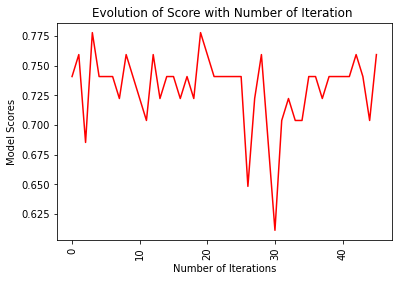

In [59]:
# plot the Evolution of Score with Number of Iteration
plt.plot(X, y_values_new3, color ='r', label ='Model Scores')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.xticks(rotation=90)

Repeat the steps from step 2. *Has this extra feature improved model performance?*

Response to Questions(Performance of the model)X3 : The mean score after 18 iterations is 0.73 which indicates that, the additional feature has not really added any improvement on the score. The standard deviation is 0.030 which shows the variaiton from mean which is higher compared to the previous models after 18 iterations. 

## Step 5: exploring

Create at least 3 more models, adding features or changing the number and size of the hidden layers. Print out the average score for your best model. Comment on what you've found.

### Let us first add features and have a deeper look

In [60]:
X4 = [] # inputs
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        features = [int(x) for x in lines[i+5].strip().split('\t')] # Split the next line to get our features
        featur = [int(x) for x in lines[i+10].strip().split('\t')]
        X4.append(features + featur)
        y.append(classes[line]) # And record which class this set of features belongs to

In [61]:
# Convert list to numpy array
X4 = np.array(X4)
X4

array([[-1, -1, 63, ..., -3,  0,  0],
       [ 0, -1, 59, ...,  1,  4,  0],
       [-1, -1, 65, ..., -1,  1,  0],
       ...,
       [-3,  0,  8, ...,  4, -1,  1],
       [-4,  1,  7, ...,  5, -6,  1],
       [-4, -1,  9, ...,  7, -2,  2]])

In [62]:
# Split data into training and test sets.
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

In [63]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test  = scaler.transform(X4_test)

In [64]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter = 10000)

In [65]:
# Let us fit or tain data
mlp.fit(X4_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [66]:
# Use test set to set back the score
predict4 = mlp.predict(X4_test)

In [67]:
scores3 = mlp.score(X4_test, y_test)
print(scores3)
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,predict4))

0.7222222222222222
[[23  0  0  0]
 [ 2 12  3  1]
 [ 1  6  3  0]
 [ 1  0  1  1]]


In [68]:
# Let us run and save the result in a file calls scoreResult.csv
filename = 'scoreResult4.csv'
with open(filename, 'a') as file:                 # open the filename as file 
    file.write(str(scores3) + '\n')               # write the content of each on scoreResult4.csv

In [69]:
# Load the scoreResult in a list called y_values_new 
y_values4 = [line.rstrip('\n') for line in open('scoreResult4.csv', 'r')]
y_values_new4 = []
for item in y_values4:
    y_values_new4.append(float(item)) 
y_values_new4 = np.array(y_values_new4)
print(y_values_new4)
X = np.array([int(i) for i in range(0,len(y_values_new4))])   # Number of iterations
X 

[0.81481481 0.7962963  0.81481481 0.77777778 0.75925926 0.75925926
 0.7962963  0.77777778 0.77777778 0.77777778 0.7962963  0.77777778
 0.75925926 0.75925926 0.77777778 0.83333333 0.75925926 0.75925926
 0.7962963  0.77777778 0.77777778 0.77777778 0.81481481 0.75925926
 0.75925926 0.77777778 0.75925926 0.77777778 0.77777778 0.77777778
 0.83333333 0.7962963  0.7962963  0.77777778 0.81481481 0.83333333
 0.74074074 0.7962963  0.74074074 0.7962963  0.7962963  0.81481481
 0.81481481 0.77777778 0.77777778 0.72222222]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [70]:
#Calculate the average of the scores 
Mean_Score = y_values_new4.mean()
Mean_Score
print('Mean Score of the Performace is',""+ str(Mean_Score))

Mean Score of the Performace is 0.78341384863124


In [71]:
#Calculate the Standard deviation of the scores
Std_deviation_Score = y_values_new4.std()
Std_deviation_Score
print('Std_deviation of the Performace is',""+ str(Std_deviation_Score))

Std_deviation of the Performace is 0.024685522893326706


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

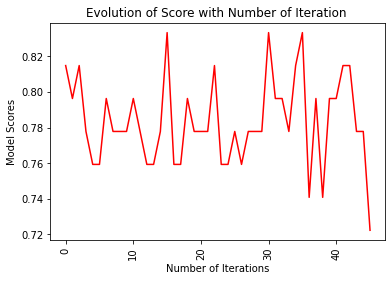

In [72]:
# plot the Evolution of Score with Number of Iteration
plt.plot(X, y_values_new4, color ='r', label ='Model Scores')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.xticks(rotation=90)

### Let us have a look at the second case:

In [73]:
#Addition of two features with different formulars (f1,f2,f3 and t1,t2 and t3)
X5 = [] # inputs
y = [] # true values
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3} # Encoding the classes as integers

# Here, we iterate over the lines of the file. If a line matches one of our classes, we split the next line 
# to get the six readings and use those as our features. 
for i in range(len(lines) - 1):
    line = lines[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        features = [int(x) for x in lines[i+5].strip().split('\t')] # Split the next line to get our features
        X5.append(features)
        y.append(classes[line]) # And record which class this set of features belongs to

In [74]:
X_new1 = []
for x in X5:
    force_squared = x[0]**2 + x[1]**2 + x[2]**2
    torge_squared = x[3]**2 + x[4]**2 + x[5]**2
    X_new1.append(x + [np.sqrt(force_squared)] + [np.sqrt(torge_squared)])
print(X_new1[0]) # Look at the first input

[-1, -1, 63, -3, -1, 0, 63.0158710167526, 3.1622776601683795]


In [75]:
# Convert list to numpy array
X5 = np.array(X_new1)

In [76]:
# Split data into training and test sets.
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=42)

In [77]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X5_train = scaler.fit_transform(X5_train)
X5_test  = scaler.transform(X5_test)

In [78]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(20,20,20), max_iter = 10000)

In [79]:
# Let us fit or tain data
mlp.fit(X5_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [80]:
# Use test set to set back the score
predict5 = mlp.predict(X5_test)

In [81]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
scores5 = mlp.score(X5_test, y_test)
print(scores5)
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,predict5))

0.7777777777777778
[[23  0  0  0]
 [ 3 13  1  1]
 [ 0  3  6  1]
 [ 1  0  2  0]]


In [82]:
# Let us run and save the result in a file calls scoreResult.csv
filename = 'scoreResult6.csv'
with open(filename, 'a') as file:                 # open the filename as file 
    file.write(str(scores3) + '\n')               # write the content of each on scoreResult6.csv

In [83]:
# Load the scoreResult in a list called y_values_new 
y_values6 = [line.rstrip('\n') for line in open('scoreResult6.csv', 'r')]
y_values_new6 = []
for item in y_values6:
    y_values_new6.append(float(item)) 
y_values_new6 = np.array(y_values_new6)
print(y_values_new6)
X = np.array([int(i) for i in range(0,len(y_values_new6))])   # Number of iterations
X 

[0.81481481 0.81481481 0.7962963  0.81481481 0.77777778 0.75925926
 0.75925926 0.7962963  0.77777778 0.77777778 0.77777778 0.7962963
 0.77777778 0.75925926 0.75925926 0.77777778 0.83333333 0.75925926
 0.75925926 0.7962963  0.77777778 0.77777778 0.77777778 0.81481481
 0.75925926 0.75925926 0.77777778 0.75925926 0.77777778 0.77777778
 0.83333333 0.7962963  0.7962963  0.77777778 0.77777778 0.77777778
 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778 0.77777778
 0.77777778 0.77777778 0.77777778 0.72222222]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [84]:
#Calculate the average of the scores 
Mean_Score = y_values_new6.mean()
Mean_Score
print('Mean Score of the Performace is',""+ str(Mean_Score))

Mean Score of the Performace is 0.7809983896940418


In [85]:
#Calculate the Standard deviation of the scores
Std_deviation_Score = y_values_new6.std()
Std_deviation_Score
print('Std_deviation of the Performace is',""+ str(Std_deviation_Score))

Std_deviation of the Performace is 0.020543238038926034


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

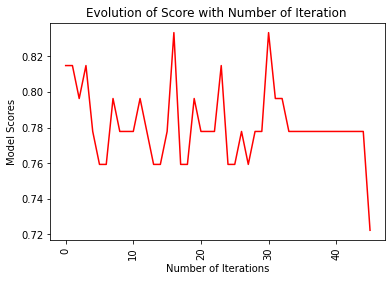

In [86]:
# plot the Evolution of Score with Number of Iteration
plt.plot(X, y_values_new6, color ='r', label ='Model Scores')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.xticks(rotation=90)

### Let us change the number of hidden layers is X2 to see how it behave

In [87]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [88]:
# Preparing and scaling the inputs
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test  = scaler.transform(X2_test)

In [89]:
# Creating the neural network
mlp = MLPC(hidden_layer_sizes=(30,30,30), max_iter = 10000)

In [90]:
# Let us fit or tain data
mlp.fit(X2_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
# Use test set to set back the score
predictions = mlp.predict(X2_test)

In [92]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
scores2 = mlp.score(X2_test, y_test)
print(scores2)
# The confusion matrix gives a better picture of what errors are slipping in
print(confusion_matrix(y_test,predictions))

0.7962962962962963
[[23  0  0  0]
 [ 1 13  3  1]
 [ 1  2  6  1]
 [ 1  1  0  1]]


In [93]:
# Let us run and save the result in a file calls scoreResult.csv
filename = 'scoreResult5.csv'
with open(filename, 'a') as file:                 # open the filename as file 
    file.write(str(scores2) + '\n')               # write the content of each on scoreResult2.csv

In [94]:
# Load the scoreResult in a list called y_values_new 
y_values5 = [line.rstrip('\n') for line in open('scoreResult5.csv', 'r')]
y_values_new5 = []
for item in y_values5:
    y_values_new5.append(float(item)) 
y_values_new5 = np.array(y_values_new5)
print(y_values_new5)
X = np.array([int(i) for i in range(0,len(y_values_new5))]) # Number of iterations
X 

[0.85185185 0.83333333 0.77777778 0.77777778 0.81481481 0.85185185
 0.7962963  0.83333333 0.81481481 0.81481481 0.81481481 0.85185185
 0.83333333 0.81481481 0.81481481 0.81481481 0.7962963  0.85185185
 0.77777778 0.85185185 0.83333333 0.83333333 0.83333333 0.7962963
 0.81481481 0.81481481 0.7962963  0.7962963  0.83333333 0.75925926
 0.83333333 0.83333333 0.7962963  0.81481481 0.81481481 0.77777778
 0.7962963  0.81481481 0.81481481 0.87037037 0.83333333 0.81481481
 0.81481481 0.81481481 0.85185185 0.7962963 ]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [95]:
#Calculate the average of the scores 
Mean_Score = y_values_new5.mean()
Mean_Score
print('Mean Score of the Performace is',""+ str(Mean_Score))

Mean Score of the Performace is 0.8172302737520131


In [96]:
#Calculate the Standard deviation of the scores
Std_deviation_Score = y_values_new5.std()
Std_deviation_Score
print('Std_deviation of the Performace is',""+ str(Std_deviation_Score))

Std_deviation of the Performace is 0.02368025953277415


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

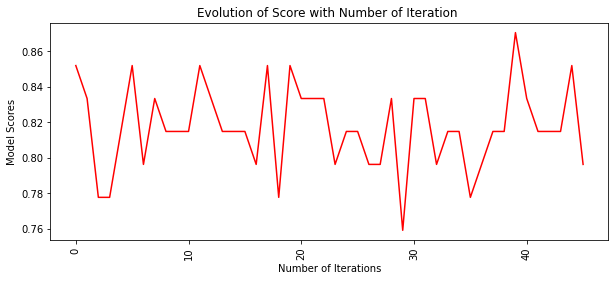

In [97]:
fig = plt.figure(figsize=(10,4))
plt.plot(X, y_values_new5, color ='r', label ='Model Scores')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.xticks(rotation=90)

Compare all the scores with all the 6 models 

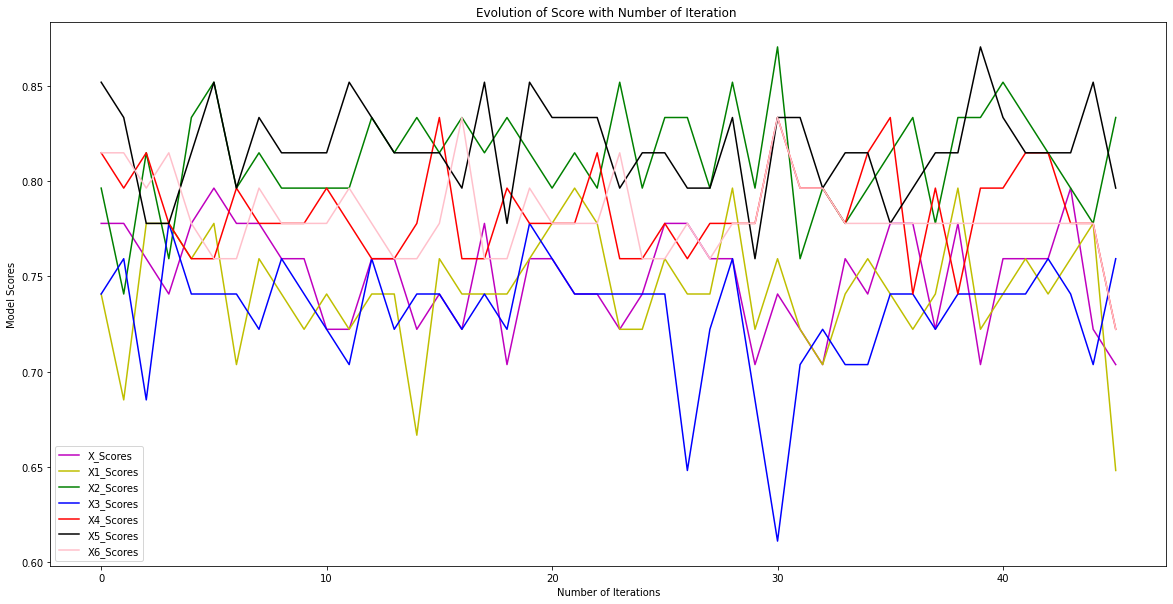

In [99]:
#Draw a line graph to compare the scores of each model. 
fig = plt.figure(figsize=(20,10))
plt.plot(X,y_values_new, color ='m', label ='X_Scores')
plt.plot(X,y_values_new1, color ='y', label ='X1_Scores')
plt.plot(X,y_values_new2, color ='g', label ='X2_Scores')
plt.plot(X,y_values_new3, color ='b', label ='X3_Scores')
plt.plot(X,y_values_new4, color ='r', label ='X4_Scores')
plt.plot(X,y_values_new5, color ='k', label ='X5_Scores')
plt.plot(X,y_values_new6, color ='pink', label ='X6_Scores')
plt.title('Evolution of Score with Number of Iteration ')
plt.xlabel('Number of Iterations')
plt.ylabel('Model Scores')
plt.legend()

From the graph X5 & X2 performed best among the models but X5 could be rated as the best having the highest value and the lest is also higher than the least of X2. 